In [3]:
from __future__ import print_function

%matplotlib inline


import numpy as np
import pysptools.util as util
import pysptools.eea as eea
import pysptools.abundance_maps as amp
import os
import os.path as osp
import spectral.io.envi as envi
import matplotlib.pyplot as plt
import pysptools.classification as cls
from spectral import *
import cProfile, pstats
import scipy.io

In [51]:
r2_reg = scipy.io.loadmat('r2_reg.mat')
r2_reg = r2_reg['r2_reg']

In [52]:
r2_reg.shape

(500, 500, 372)

In [53]:
np.max(r2_reg[:,:,17])

1.7721996

In [54]:
image_enhanced = np.zeros([500,500,3])
image_enhanced[:,:,0] = r2_reg[:,:,53] 
image_enhanced[:,:,1] = r2_reg[:,:,35] 
image_enhanced[:,:,2] = r2_reg[:,:,17] 

image_enhanced_full = image_enhanced/np.max(image_enhanced)

image_enhanced_bw = np.zeros([500,500,3])
image_enhanced_bw[:,:,0] = image_enhanced[:,:,0]/np.max(image_enhanced[:,:,0])
image_enhanced_bw[:,:,1] = image_enhanced[:,:,1]/np.max(image_enhanced[:,:,1])
image_enhanced_bw[:,:,2] = image_enhanced[:,:,2]/np.max(image_enhanced[:,:,2])

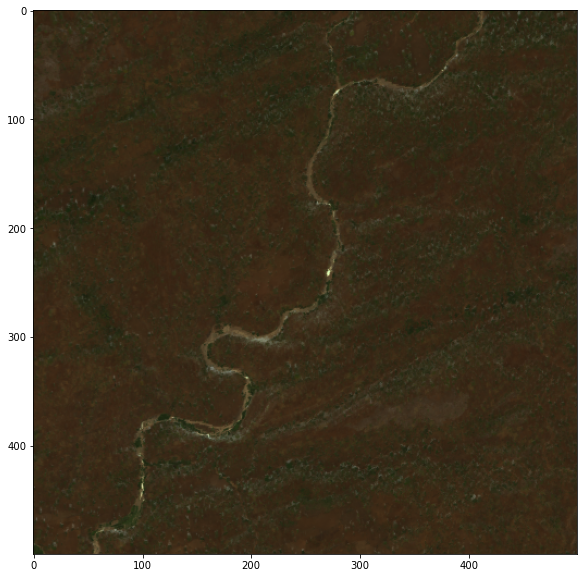

In [55]:
fig, ax = plt.subplots(figsize=(10,10))
plt.imshow(image_enhanced_full)
plt.show()

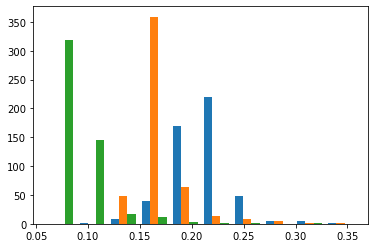

0.35822293081074563


In [60]:
plt.hist(image_enhanced_full[2])
plt.show()
print(np.max(image_enhanced_full[2]))

In [61]:
image_reg_full = 3*(image_enhanced_full)
image_reg_full = np.clip(image_reg_full,0,1)
print(np.min(image_reg_full[2]))

0.17691649771218462


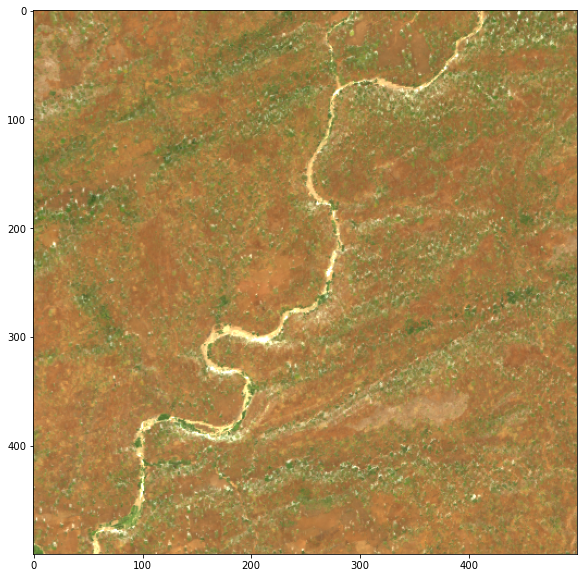

In [62]:
fig, ax = plt.subplots(figsize=(10,10))
plt.imshow(image_reg_full)
plt.show()

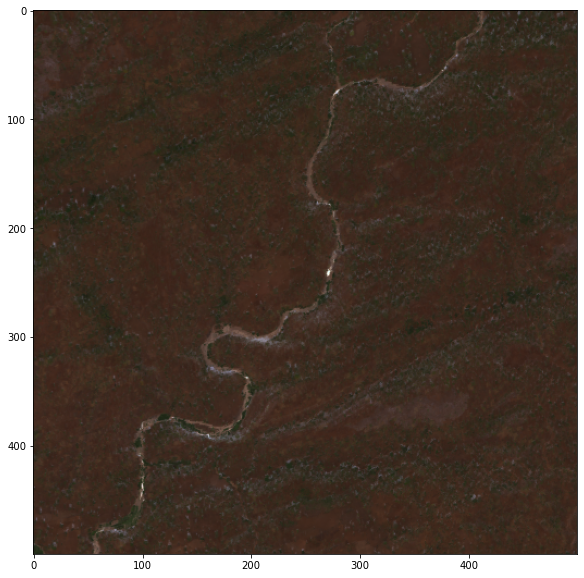

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
plt.imshow(image_enhanced_bw)
plt.show()

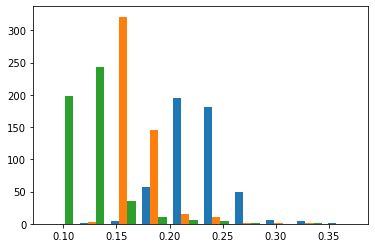

0.08321789037048119


In [13]:
plt.hist(image_enhanced_bw[0])
plt.show()
print(np.min(image_enhanced_bw[0]))

In [14]:
image_reg_bw = 5*(image_enhanced_bw-0.1)
image_reg_bw = np.clip(image_reg_bw,0,1)
print(np.min(image_reg_bw[2]))

0.0


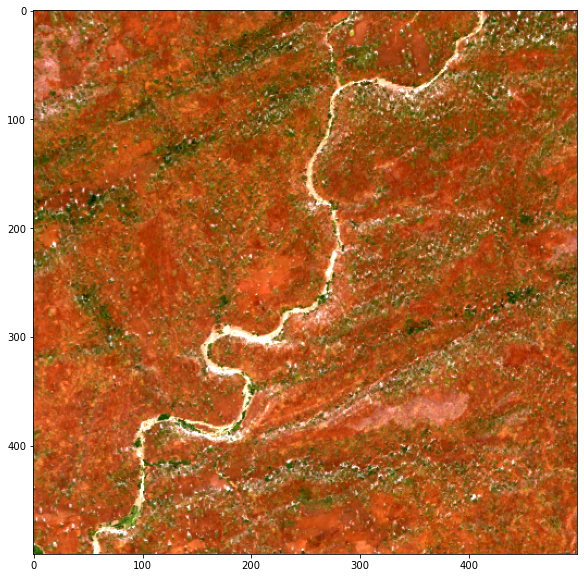

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
plt.imshow(image_reg_bw)
plt.show()

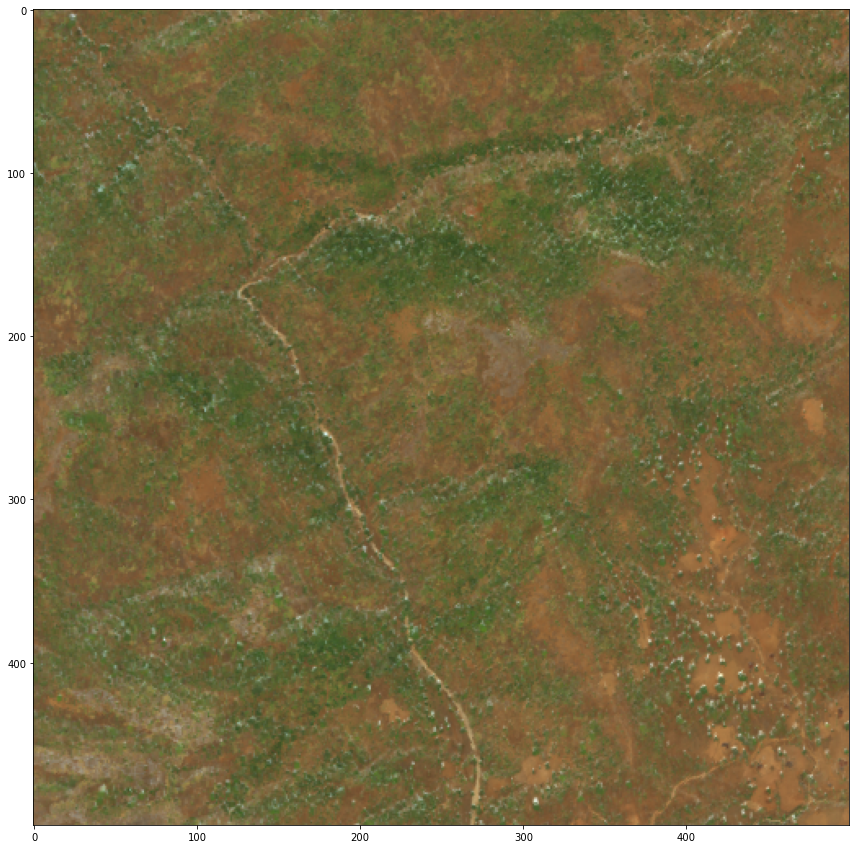

In [43]:
r1_reg = scipy.io.loadmat('r1_reg.mat')
r1_reg = r1_reg['r1_reg']

image_enhanced = np.zeros([500,500,3])

image_enhanced[:,:,0] = r1_reg[:,:,53] 
image_enhanced[:,:,1] = r1_reg[:,:,35] 
image_enhanced[:,:,2] = r1_reg[:,:,17] 

image_enhanced_bw = np.zeros([500,500,3])
image_enhanced_bw[:,:,0] = image_enhanced[:,:,0]/np.max(image_enhanced[:,:,0])
image_enhanced_bw[:,:,1] = image_enhanced[:,:,1]/np.max(image_enhanced[:,:,1])
image_enhanced_bw[:,:,2] = image_enhanced[:,:,2]/np.max(image_enhanced[:,:,2])

fig, ax = plt.subplots(figsize=(15,15))
plt.imshow(image_enhanced_bw)
plt.show()

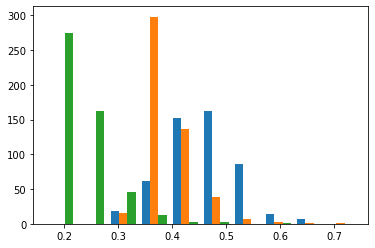

0.7404639425642895


In [44]:
plt.hist(image_enhanced_bw[0])
plt.show()
print(np.max(image_enhanced_bw[0]))

In [38]:
image_reg_bw = 20/9*(image_enhanced_bw-0.15)
image_reg_bw = np.clip(image_reg_bw,0,1)
print(np.min(image_reg_bw[2]))

0.22267562696402177


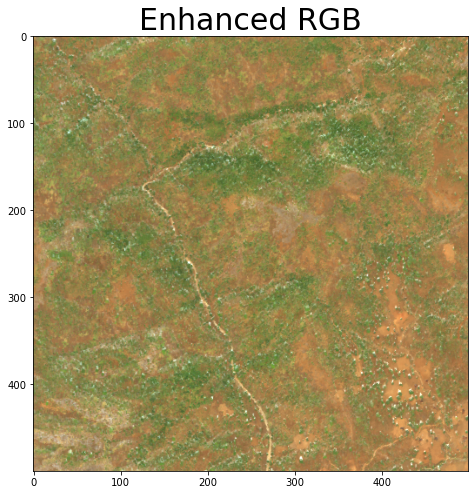

In [39]:
fig, ax = plt.subplots(figsize=(8,8))
plt.imshow(image_reg_bw)
plt.title('Enhanced RGB', fontsize = '30')
plt.show()